In [1]:
%pip install numpy
%pip install keras
%pip install TensorFlow
%pip install matplotlib
%pip install os
%pip install glob
%pip install opencv-python
%pip install kagglehub
#all imports
import kagglehub
import tensorflow as tf
import kagglehub
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2024-11-18 00:54:01.781314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 00:54:01.781405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 00:54:01.782948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 00:54:01.792434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 00:54:03.021990: W tensorflow/compiler/tf2

Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [2]:
path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [3]:
os.system("ls /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/")
os.system("rm -rf /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/nothing")
os.system("rm -rf /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/space")
os.system("rm -rf /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/del")
os.system("rm -rf /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_test/asl_alphabet_test/space_test.jpg")
os.system("rm -rf /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg")


A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


0

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
tf.config.experimental.get_memory_info('GPU:0')
gpu = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)
print("TensorFlow version:", tf.__version__)
#print("TensorRT version:", tf.experimental.tensorrt.version())

Num GPUs Available:  1
TensorFlow version: 2.15.0


2024-11-18 00:54:06.625442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 00:54:06.672022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 00:54:06.672325: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
import string
os.system("mkdir /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/newtesting")
for i in string.ascii_uppercase:
    deleteString = "mv /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/" + i + "/" + i + "15*.jpg /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/newtesting/"
    os.system(deleteString)

mkdir: cannot create directory ‘/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/newtesting’: File exists
mv: cannot stat '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/A/A15*.jpg': No such file or directory
mv: cannot stat '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/B/B15*.jpg': No such file or directory
mv: cannot stat '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/C/C15*.jpg': No such file or directory
mv: cannot stat '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/D/D15*.jpg': No such file or directory
mv: cannot stat '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/E/E15*.jpg': No such file or directory
mv: cannot stat '/root/.cache/kagglehub/datase

In [7]:
import string
# Convert labels ('A', 'B', ...) to integer indices (0, 1, 2, ...)
def create_label_lookup_table():
    letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    # Create a lookup table to map the label (string) to its integer index
    return tf.lookup.StaticHashTable(
        tf.lookup.KeyValueTensorInitializer(
            keys=tf.constant(letters), values=tf.constant(range(len(letters)), dtype=tf.int64)),
        default_value=-1)

# Initialize the lookup table
label_lookup_table = create_label_lookup_table()

path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
dataset = tf.data.Dataset.list_files(path + '/*/*.jpg')

for i in dataset.take(5):
    print(i.numpy())
def getImage(filename):
    label = tf.strings.split(filename, os.sep)[-2]
    label = tf.strings.upper(label)  # Ensure label is uppercase
    
    # Use the lookup table to convert the label to integer index
    label = label_lookup_table.lookup(label)
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [96, 96])  
    #image = image / 255.0  # Normalize to [0, 1]
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    random_delta = tf.random.uniform([], minval=-.1, maxval=.1, dtype=tf.float32)
    image = tf.image.adjust_hue(image, delta=random_delta)
    image = tf.image.adjust_brightness(image, delta=random_delta)
    return image, label



path2 = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train" + "/*/*.jpg"
label = tf.strings.split(path2, os.sep)[-2]
print(os.path.dirname(os.path.dirname(path2)))
print(label.numpy().decode('utf-8'))
dataset = dataset.map(getImage)
dataset = dataset.shuffle(buffer_size=4000).batch(256)  # Shuffle the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)
for image, label in dataset.take(1):
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)
#aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, 
#                         shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")
#for i in string.ascii_uppercase:
#    deleteString = "mv /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/" + i + "/" + i + "15*.jpg /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/newtesting/"
#    os.system(deleteString)
#    deleteString2 = "rm /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/" + i + "/" + i + "2*.jpg"
#    os.system(deleteString2)
#    deleteString3 = "rm /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/" + i + "/" + i + "8*.jpg"
#    os.system(deleteString3)
    # Create a tf.data.Dataset from a directory of images and their labels


b'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/X/X2808.jpg'
b'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/S/S1103.jpg'
b'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/S/S1615.jpg'
b'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/N/N356.jpg'
b'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/O/O762.jpg'
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train
*
Image shape: (256, 96, 96, 3)
Label shape: (256,)


In [8]:
epochs = 20 #how many times it reads through is what epochs is. 
lr = 1e-3 #learning rate
batch_size = 256 #how many images to look at a time
img_dims = (96,96,3) # Height, width, num of RGB channels

In [9]:
#data = []
#labels = []
#arrays for data and labels 
#image_files = [f for f in glob.glob(r'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train' + "/**/*", recursive=True) if not os.path.isdir(f)]
#takes the image files from the files and then put it in the arrays
#random.shuffle(image_files) #shuffling the image files. 
#glob.glob is like a library that reads in data files and searching for files that follow a data pattern. 

In [ ]:
# Adds images to array, also gives it a label

#for img in image_files:
#    image = cv2.imread(img)#look at image
#    image = cv2.resize(image, (img_dims[0], img_dims[1])) # Resizes every image to be the same size. 
#    image = img_to_array(image)#convert to array
#    data.append(image)#add to data list 

#    label = img.split(os.path.sep)[-2]#add label to each image classifying what the alphabet is for each image. 
#    label = ord(label) - ord('A') # Convert label to numerical value (0-25)
#    labels.append([label])# actually add to data list. 

# Data pre-processing, converts data and labels to numpy array (Easier for computer to work with numpy arrays instead of normal arrays. )
#try:
#   data = np.array(data, dtype='float') / 255.0 
#    labels = np.array(labels)
#except Exception as e:
#    print(f"Error converting data to numpy array: {e}")

In [ ]:
# Splits dataset into training and testing
# test_size = 0.2 means that 20% of the dataset will be used for testing
#trainX, testX, trainY, testY = train_test_split(data, labels, test_size = 0.2, random_state=42)

#trainY = to_categorical(trainY, num_classes=26)#we have 26 folders for 26 aplhabets. 
#testY = to_categorical(testY, num_classes=26)

#data = []
#labels = []
# Augmentation of dataset (Changes and adds error and adds altered version of the training data.)
#aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, 
#                         shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")


TypeError: 'tuple' object is not callable

In [ ]:
# Function to extract label from the filename
def extract_label(filename):
    # Assuming the label is the first character (like 'Y' in 'Y1522.jpg')
    label = filename.split(os.sep)[-1][0]  # Extract first letter of the filename
    return label

# Function to load and preprocess the image
def load_image(filename):
    # Read the image file
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode the image as RGB
    image = tf.image.resize(image, [96, 96])  # Resize image to 96x96
    return image

# Function to prepare the dataset of images and labels
def prepare_dataset(directory):
    # Get all the image files in the directory
    image_files = [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.endswith('.jpg')]

    images = []
    labels = []
    
    for file in image_files:
        # Load the image and its label
        image = load_image(file)
        label_str = extract_label(file)
        
        # Convert label to integer index (e.g., 'A' -> 0, 'B' -> 1, ..., 'Z' -> 25)
        label = ord(label_str) - ord('A')
        
        # Append the image and label
        images.append(image)
        labels.append(label)
    
    # Convert the lists to tensors
    images_tensor = tf.convert_to_tensor(images)
    labels_tensor = tf.convert_to_tensor(labels, dtype=tf.int64)
    
    return images_tensor, labels_tensor


directory = '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/newtesting' 
testX, testY = prepare_dataset(directory)
print(testX.shape)
print(testY.shape)
print(testY[0])


(2886, 96, 96, 3)
(2886,)
tf.Tensor(21, shape=(), dtype=int64)


In [10]:
# Height and width of image (96 x 96)
# Depth is RGB values
def build(height, width, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    # Need to check whether channels are first or last
    if K.image_data_format() == 'channels_first':
        inputShape = (depth, height, width)
        chanDim = 1
    # Adding convolution layer
    model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape)) # 32 filters, 3x3 image - passes over picture to highlight features
    model.add(Activation('relu')) #chooses what is actually a distinguishing feature
    model.add(BatchNormalization(axis=chanDim)) # Normalizing the values 
    # (Some data points may have high value, others may be low, causing the higher values to overshadow the lower values)
    # Max pooling, done to reduce unwanted values AKA noise in data set
    model.add(MaxPooling2D(pool_size=(3,3))) #ignores unwanted things in a dataset - only done on half
    model.add(Dropout(0.25)) # Prevents overfitting - ignores some of the dataset

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten()) # Flattened so our layers are 1D to be passed into dense layer
    model.add(Dense(1024)) #combines all feature map patterns to make prediction
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation('softmax')) #  probability of class - prob of a for example

    return model



In [11]:
model = build(width = img_dims[0], height = img_dims[1], depth = img_dims[2], classes = 26)

# Compiles the model
opt = keras.optimizers.legacy.Adam(lr = lr, decay = lr/epochs)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 activation (Activation)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 96, 96, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# Builds the model
with tf.device('/GPU:0'):
    model = build(width = img_dims[0], height = img_dims[1], depth = img_dims[2], classes = 26)

# Compiles the model
    opt = keras.optimizers.legacy.Adam(lr = lr, decay = lr/epochs)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Trains the model
    H = model.fit(dataset, validation_data=(testX, testY), epochs = epochs)

Epoch 1/20
294/294 [==============================] - 75s 236ms/step - loss: 1.3687 - accuracy: 0.5909 - val_loss: 1.5619 - val_accuracy: 0.5811
Epoch 2/20
294/294 [==============================] - 72s 233ms/step - loss: 0.2671 - accuracy: 0.9114 - val_loss: 1.3166 - val_accuracy: 0.6923
Epoch 3/20
294/294 [==============================] - 69s 220ms/step - loss: 0.1109 - accuracy: 0.9642 - val_loss: 0.6742 - val_accuracy: 0.7990
Epoch 4/20
294/294 [==============================] - 72s 231ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.8707 - val_accuracy: 0.8021
Epoch 10/20
294/294 [==============================] - 70s 226ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 1.2605 - val_accuracy: 0.7717
Epoch 11/20
294/294 [==============================] - 69s 222ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.2339 - val_accuracy: 0.9304
Epoch 12/20
294/294 [==============================] - 72s 232ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.7628 - val

In [ ]:
model.save('sign_language_detection5.keras')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_12 (Ba  (None, 96, 96, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)       

In [ ]:
model.load_weights("sign_language_detection5.keras");

model.evaluate(testX, testY)

91/91 [==============================] - 1s 7ms/step - loss: 0.2018 - accuracy: 0.9688


[0.20175734162330627, 0.9688149690628052]

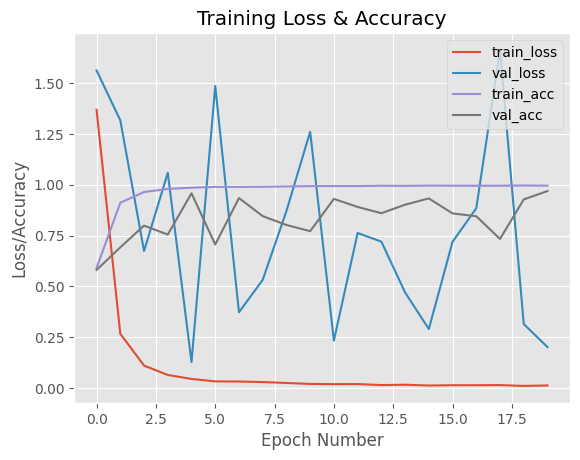

In [ ]:
# Plot the training and validation loss and accuracy

plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss & Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')